In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



In [32]:
P1gen= 'Data/Plant_1_Generation_Data.csv'
P2gen='Data/Plant_2_Generation_Data.csv'

df1=pd.read_csv(P1gen)
df2=pd.read_csv(P2gen)
df=pd.concat([df1,df2])
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [33]:
df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'])
df['Hour']= df['DATE_TIME'].dt.hour
df['dayofweek']=df['DATE_TIME'].dt.day_of_week

In [34]:
df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Hour,dayofweek
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,4
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0,4
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0,4
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0,4
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0,4
...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,23,2
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,23,2
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,23,2
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,23,2


In [35]:
df['PLANT_ID'].value_counts()

4135001    68778
4136001    67698
Name: PLANT_ID, dtype: int64

In [57]:
df.isna().value_counts()

DATE_TIME  PLANT_ID  SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  Hour   dayofweek
False      False     False       False     False     False        False        False  False        136476
dtype: int64

In [36]:
y = df['TOTAL_YIELD']
X = df.drop(columns = 'TOTAL_YIELD')

experimental
/

In [37]:
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['SOURCE_KEY']])

(136476,)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

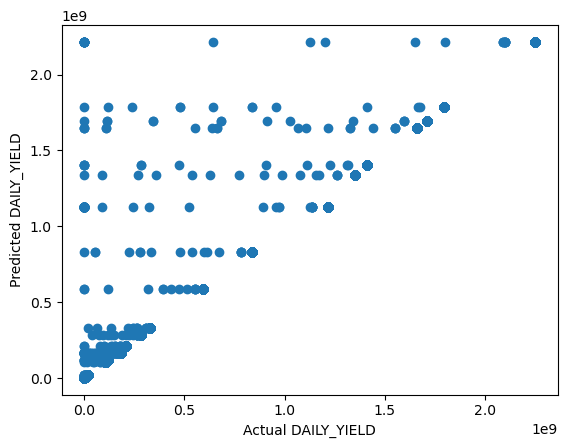

In [50]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual DAILY_YIELD")
plt.ylabel("Predicted DAILY_YIELD")
plt.show()

<Axes: >

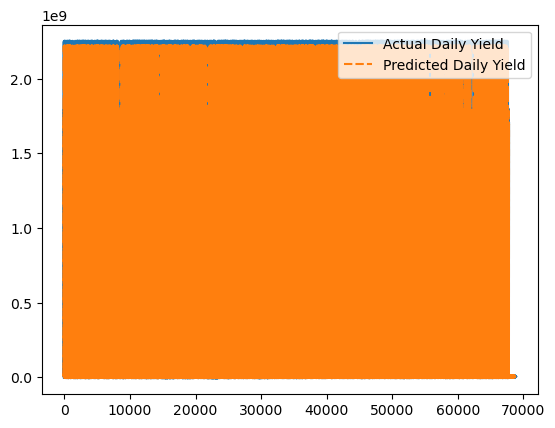

In [52]:
pred= pd.DataFrame({'Actual Daily Yield': y_test,'Predicted Daily Yield':y_pred})
sns.lineplot(data=pred, palette="tab10", linewidth=2.5)

